**Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data_train = pd.read_csv("/content/train.csv")

**Data** **Processing**

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())

In [6]:
data_train.drop("PassengerId",axis=1,inplace=True)
data_train.drop("Name",axis=1,inplace=True)
data_train.drop("Ticket",axis=1,inplace=True)
data_train.drop("Cabin",axis=1,inplace=True)

In [7]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Data Visualization**

<ipython-input-8-06cb8d079155>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_train, x='Survived', y='Embarked', inner='box', palette='Dark2')


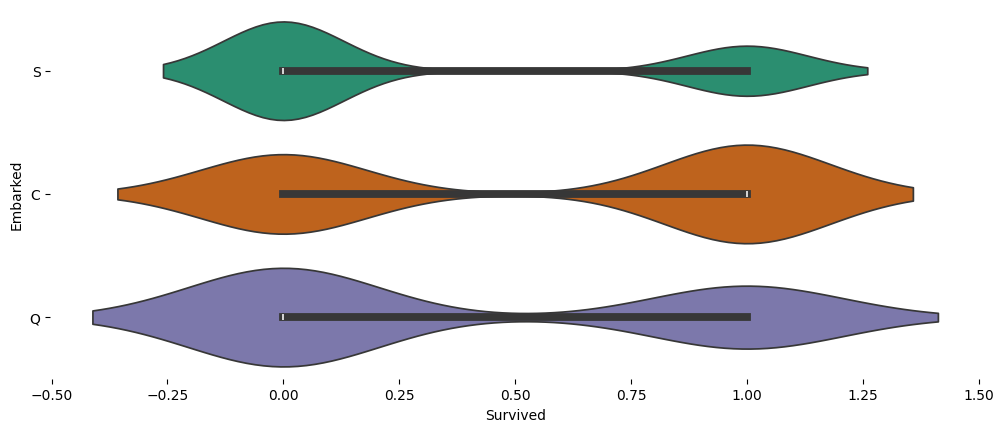

In [8]:
figsize = (12, 1.2 * len(data_train['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_train, x='Survived', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

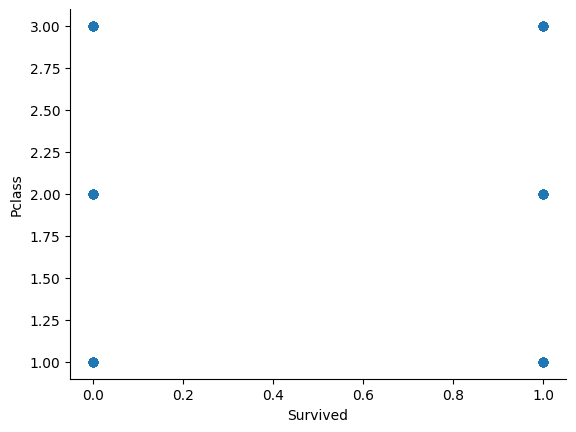

In [9]:
data_train.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

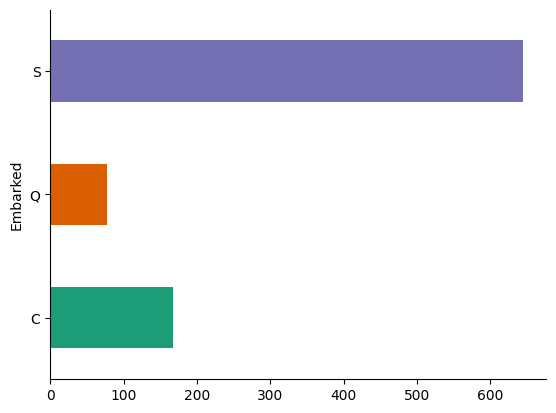

In [10]:
data_train.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

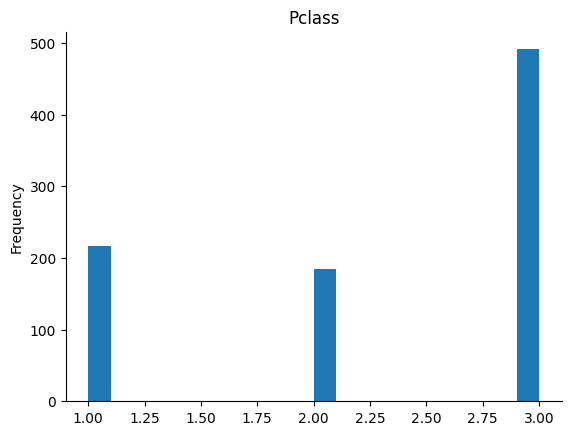

In [11]:
data_train['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-12-77154d74798d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_train, x='Survived', y='Sex', inner='box', palette='Dark2')


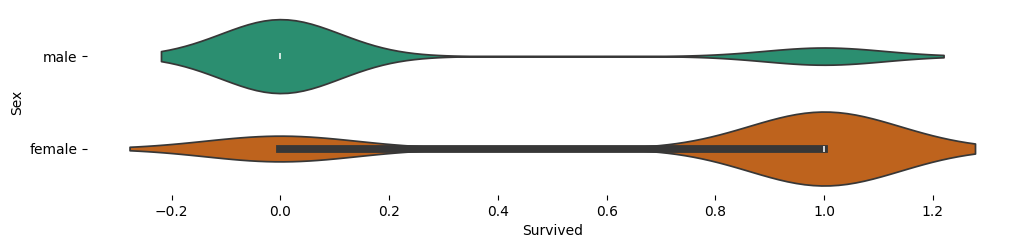

In [12]:
figsize = (12, 1.2 * len(data_train['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_train, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

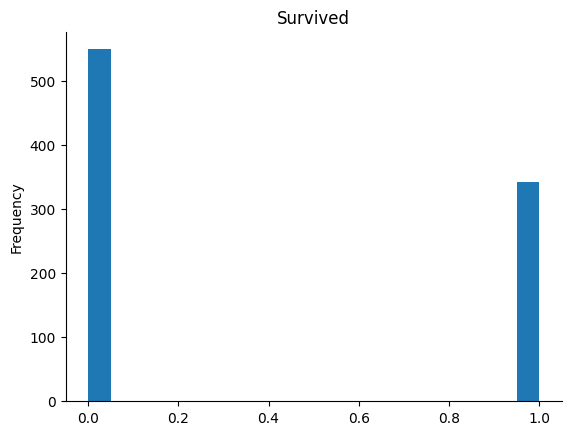

In [13]:
data_train['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

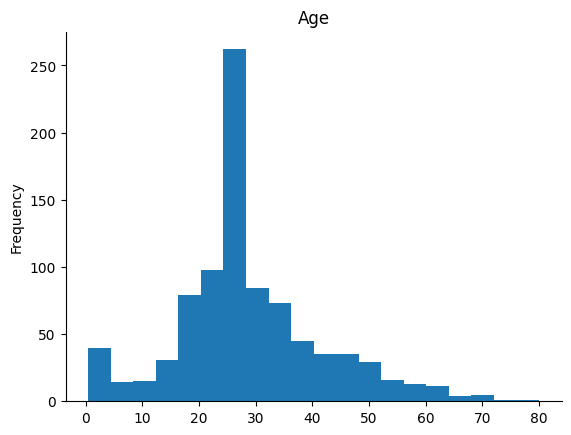

In [14]:
data_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
label_encoder = LabelEncoder()
data_train["Sex"] = label_encoder.fit_transform(data_train["Sex"])
data_train["Embarked"] = label_encoder.fit_transform(data_train["Embarked"])

In [16]:
scaler = MinMaxScaler()
data_train["Fare"] = MinMaxScaler().fit_transform(data_train["Fare"].values.reshape(-1, 1))



In [17]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.014151,2
1,1,1,0,38.0,1,0,0.139136,0
2,1,3,0,26.0,0,0,0.015469,2
3,1,1,0,35.0,1,0,0.103644,2
4,0,3,1,35.0,0,0,0.015713,2


In [18]:
y=data_train["Survived"]
data_train = data_train.drop("Survived",axis=1)


In [19]:
logestic_regression = LogisticRegression()
log_model = logestic_regression.fit(data_train , y)

**`Testing model `**

In [20]:
test_data = pd.read_csv("/content/test.csv")

In [21]:
test_data.drop("PassengerId",axis=1,inplace=True)
test_data.drop("Name",axis=1,inplace=True)
test_data.drop("Ticket",axis=1,inplace=True)
test_data.drop("Cabin",axis=1,inplace=True)

In [22]:
test_data["Sex"] = label_encoder.fit_transform(test_data["Sex"])
test_data["Embarked"] = label_encoder.fit_transform(test_data["Embarked"])

In [23]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [24]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

In [25]:
test_data["Fare"] = MinMaxScaler().fit_transform(test_data["Fare"].values.reshape(-1, 1))

In [26]:
y_pred=log_model.predict(test_data)

In [27]:
true_data = pd.read_csv("/content/gender_submission.csv")

In [28]:
true_data.drop("PassengerId",axis=1,inplace=True)

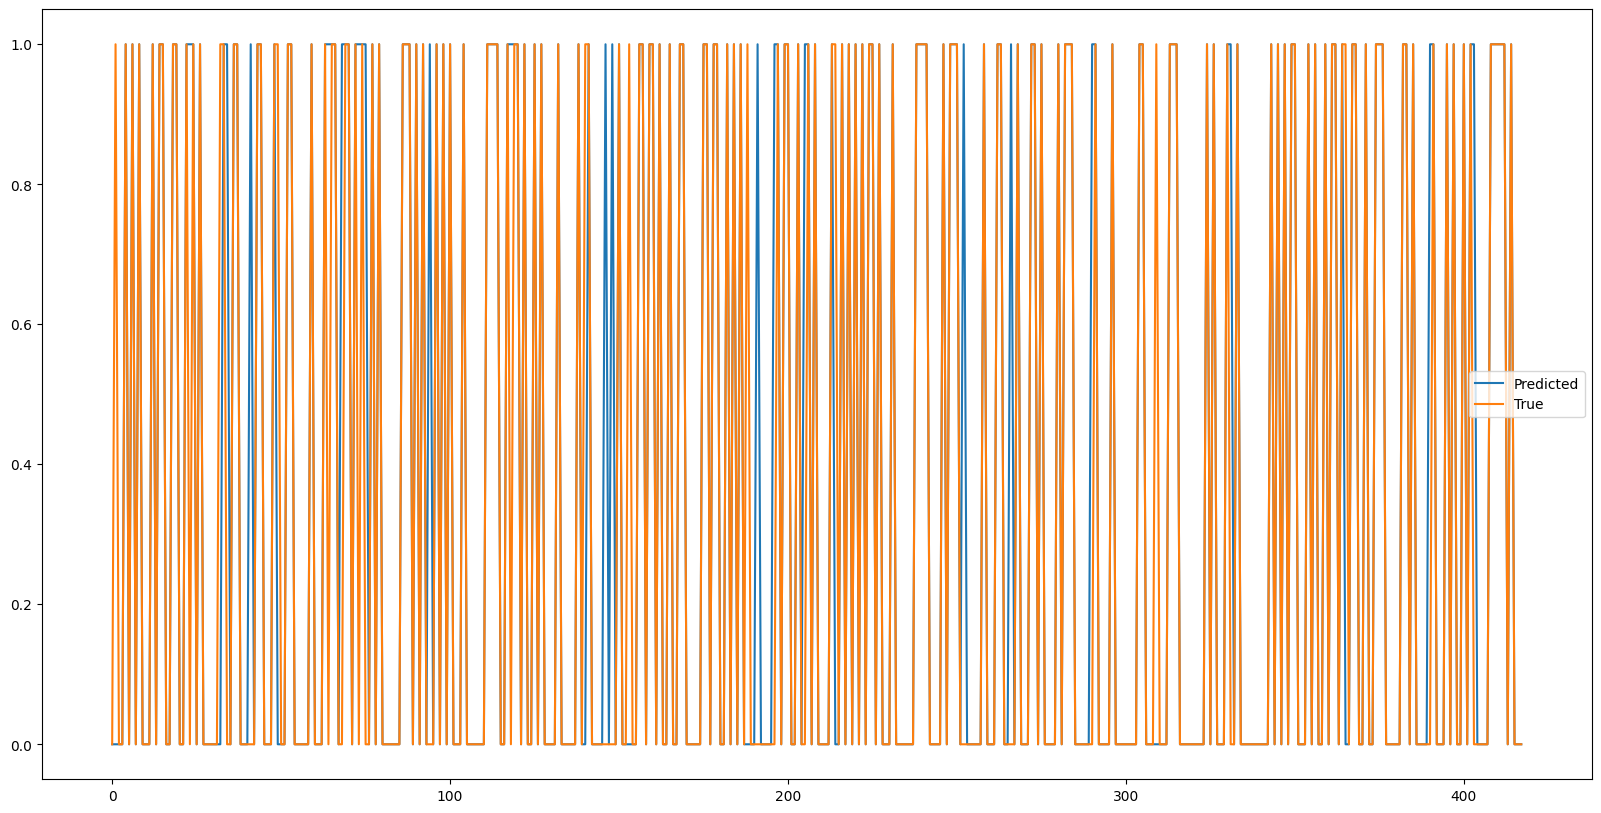

In [29]:
plt.figure(figsize=(20,10))
plt.plot(y_pred, label='Predicted')
plt.plot(true_data, label='True')
plt.legend()
plt.show()


In [30]:
accuracy = accuracy_score(y_pred, true_data)
print(accuracy)


0.930622009569378
